<a href="https://colab.research.google.com/github/BRAYAN142002/MineriaDeDatos-LimpiezayTransformacion/blob/main/Taller1_CHernandez_BMajin_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Esto te permite cargar archivos desde tu dispositivo local
uploaded = files.upload()

Saving DS_PreciosCasas.csv to DS_PreciosCasas.csv


In [ ]:
#Cargue del archivo
uploaded

{'DS_PreciosCasas.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,Vi

In [ ]:
#Creacion del dataframe a partir del archivo cargado
df = pd.read_csv(io.StringIO(uploaded['DS_PreciosCasas.csv'].decode('utf-8')))

In [ ]:
#1. Muestre el dataframe creado
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [ ]:
#2. Imprima la información del dataframe según el formato dado:
#El dataframe casas tiene __ observaciones y ___columnas
numero_filas = df.shape[0]
numero_columnas = df.shape[1]
print(f"El dataframe casas tiene {numero_filas} observaciones y {numero_columnas} columnas.")

El dataframe casas tiene 1460 observaciones y 81 columnas.


In [ ]:
#3. Identifique cuáles son las variables numéricas e imprima solo el nombre de dichas variables
var_numericas = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])
print("Variables numericas:")
print(var_numericas.columns)

Variables numericas:
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [ ]:
#4. Identifique cuáles son las variables categóricas e imprima solo el nombre de dichas variables
variables_categoricas = df.select_dtypes(include=['object']).columns
print("Variables categóricas:")
print(variables_categoricas)

Variables categóricas:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
#5. ¿Cuántas columnas tienen nulos en el dataframe?
#Responda a través del mensaje: En el dataframe hay ___ columnas que reportan nulos.
columnas = df.isnull().sum().sort_values(ascending=False)
columnasNulas = columnas[columnas > 0]

md("### En el dataframe hay {} columnas que reportan nulos".format(columnasNulas.count()))

### En el dataframe hay 19 columnas que reportan nulos

In [ ]:
#6. Identifique solo los nombres de las columnas que SOLO tienen nulos, póngalas en una lista
#y luego imprima la lista, teniendo en cuenta el formato indicado:
# columna 1: _______
# columna 2:________
# columna 3:________
# y así para todas las columnas.
columnas_con_nulos = df.columns[df.isnull().any()]
i = 0;
print("Columnas con valores nulos:")
for columna in columnas_con_nulos:
    print(f"columna {i+1}: {columna}")
    i+=1

Columnas con valores nulos:
columna 1: LotFrontage
columna 2: Alley
columna 3: MasVnrType
columna 4: MasVnrArea
columna 5: BsmtQual
columna 6: BsmtCond
columna 7: BsmtExposure
columna 8: BsmtFinType1
columna 9: BsmtFinType2
columna 10: Electrical
columna 11: FireplaceQu
columna 12: GarageType
columna 13: GarageYrBlt
columna 14: GarageFinish
columna 15: GarageQual
columna 16: GarageCond
columna 17: PoolQC
columna 18: Fence
columna 19: MiscFeature


In [ ]:
#7. Identifique tanto los nombres de las columnas que tienen nulos
#como el número de nulos que tiene cada columna en orden descendente
nulos_por_columna = df.isnull().sum()
# Filtrar solo las columnas que tienen nulos
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
# Ordenar las columnas por el número de nulos en orden descendente
columnas_con_nulos_ordenadas = columnas_con_nulos.sort_values(ascending=False)
# Imprimir el resultado
print("Columnas con valores nulos y su cantidad, ordenadas de mayor a menor:")
print(columnas_con_nulos_ordenadas)

Columnas con valores nulos y su cantidad, ordenadas de mayor a menor:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [ ]:
#8. Identifique solo los nombres de las columnas NUMERICAS que SOLO tienen nulos, póngalas en una lista
var_numericas = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])
numericasNulas=var_numericas.columns[var_numericas.isnull().any()]
print("Columnas numericas con valores nulos:")
print(numericasNulas)

Columnas numericas con valores nulos:
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [ ]:
#9. Identifique tanto los nombres de las columnas NUMERICAS que tienen nulos
#como el número de nulos que tiene cada columna en orden descendente
var_numericas = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])
nulos_por_columna_numerica = var_numericas.isnull().sum()
var_numericas_con_nulos = nulos_por_columna_numerica[nulos_por_columna_numerica > 0]
print(var_numericas_con_nulos.sort_values(ascending=False))

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64


In [ ]:
#10. Identifique solo los nombres de las columnas CATEGORICAS que SOLO tienen nulos,póngalas en una lista
var_categoricas = df.select_dtypes(include = ["object"])
categoricasNulas=list(var_categoricas.columns[var_categoricas.isnull().any()])
print(categoricasNulas)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
#11. Identifique tanto los nombres de las columnas CATEGORICAS que tienen nulos
#como el número de nulos que tiene cada columna en orden descendente
nulos_por_columna_categorica = var_categoricas.isnull().sum()
var_categoricas_con_nulos = nulos_por_columna_categorica[nulos_por_columna_categorica > 0]
print(var_categoricas_con_nulos.sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
Electrical         1
dtype: int64


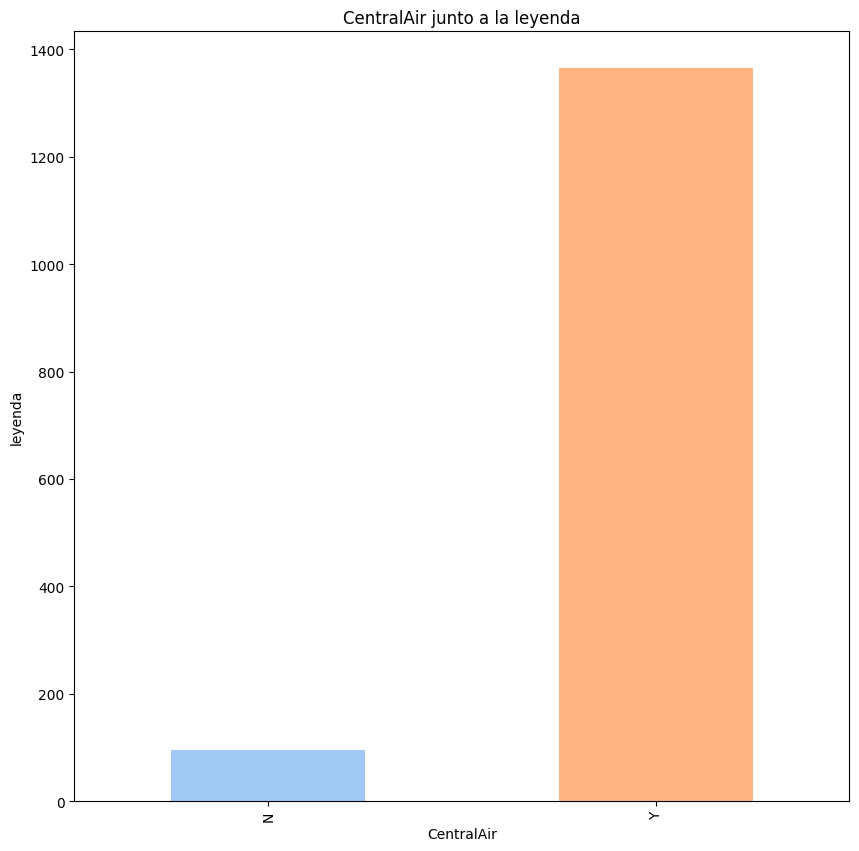

In [ ]:
#12. Visualice en gráfico barras la variable categórica CentralAir junto a la leyenda
CentralAir_Leyenda=df.groupby(['CentralAir']).size()
CentralAir_Leyenda.plot(kind='bar',figsize=(10,10),color=sns.color_palette("pastel"))
plt.title('CentralAir junto a la leyenda')
plt.xlabel('CentralAir')
plt.ylabel('leyenda')
plt.show()

Text(0.5, 1.0, 'Boxplot de la variable SalePrice')

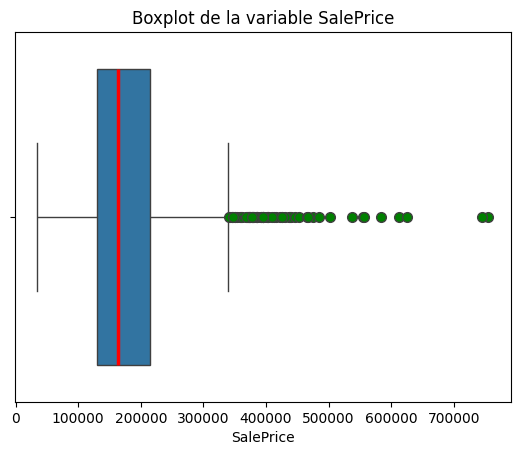

In [ ]:
#13. Realice la gráfica de cajas y bigotes para la variable SalePrice
flierprops=dict(marker='o', markerfacecolor='green', markersize=7, linestyle='none')
medianprops=dict(linestyle='-', linewidth=2.5, color='red')
sns.boxplot(x=df['SalePrice'], fliersize=5, fill=True, flierprops=flierprops, medianprops=medianprops)
plt.title('Boxplot de la variable SalePrice')

In [ ]:
#14. Imprima claramente los valores para Q1, Q3, Mediana, IQR, Li, Ls a través de los
#mensajes:
#Q1: _______
#Q3: _______
#Mediana: _______
#IQR: _______
#Li: _______
#Ls: _______
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
MEDIANA = df['SalePrice'].median()
IQR = Q3 - Q1
Li = Q1 - 1.5 * IQR
Ls = Q3 + 1.5 * IQR
print("Q1:", Q1)
print("Q3:", Q3)
print("Mediana:", MEDIANA)
print("IQR:", IQR)
print("Li:", Li)
print("Ls:", Ls)

Q1: 129975.0
Q3: 214000.0
Mediana: 163000.0
IQR: 84025.0
Li: 3937.5
Ls: 340037.5


In [ ]:
#15. Explique con sus palabras la distribución que encontró a partir de los valores
#anteriormente calculados
sustentacion_datos = 'El 25% de los datos son menores o iguales a 129975.\n El 50% de los datos son menores o iguales a 163000, y el 50% restante son mayores o iguales a este valor.\n El 75% de los datos son menores o iguales a 214000.\n El limite inferior marca el umbral por debajo del cual cualquier dato se consideraría un posible outlier.\n El limite superior marca el umbral por encima del cual cualquier dato se consideraría un posible outlier.'
md("### Distribucion de los datos: {}".format(sustentacion_datos))


### Distribucion de los datos: El 25% de los datos son menores o iguales a 129975.
 El 50% de los datos son menores o iguales a 163000, y el 50% restante son mayores o iguales a este valor.
 El 75% de los datos son menores o iguales a 214000.
 El limite inferior marca el umbral por debajo del cual cualquier dato se consideraría un posible outlier.
 El limite superior marca el umbral por encima del cual cualquier dato se consideraría un posible outlier.

In [ ]:
#16. Casas "muy caras" se interpreta como casas que superan el precio de los 500 mil
#dólares. ¿Cuántas casas “muy caras” existen en el conjunto de datos?
#Muestre siguiendo el mensaje: Existen___ casas muy caras en el conjunto de datos
casas_muy_caras = df[df['SalePrice'] > 500000]
print("Existen", len(casas_muy_caras), "casas muy caras en el conjunto de datos")

Existen 9 casas muy caras en el conjunto de datos


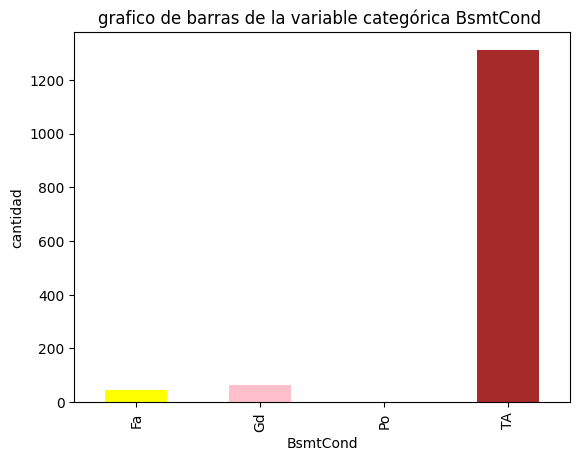

In [ ]:
#17.Realice una gráfica de barras para la variable categórica BsmtCond
df.groupby('BsmtCond').size().plot(kind='bar',color=('yellow','pink','purple','brown','y'))
plt.title('grafico de barras de la variable categórica BsmtCond ')
plt.xlabel('BsmtCond')
plt.ylabel('cantidad')
plt.show()

In [ ]:
#18. #Muestre las categorías y el número de registros para la variable categórica BsmtCond
#(tipo agrupación)
registros_bsmt_cond = df.groupby('BsmtCond').size()
print(registros_bsmt_cond)

BsmtCond
Fa      45
Gd      65
Po       2
TA    1311
dtype: int64


In [ ]:
#19. ¿Cuántos nulos tiene la variable BsmtCond?
#Responda con el mensaje indicado : La variable BsmtCond tiene ___ registros y de ellos ___
#son nulos.
numeroNulos=df['BsmtCond'].isnull().sum()
numeroRegistros=df['BsmtCond'].count()
md("### La variable BsmtCond tiene {} registros y de ellos {} son nulos".format(numeroRegistros,numeroNulos))

### La variable BsmtCond tiene 1423 registros y de ellos 37 son nulos

In [ ]:
#20. Para SOLO las variables numéricas indicadas: 'SalePrice', 'LotArea', 'OverallQual',
#'OverallCond', 'YearBuilt','1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'MoSold', 'YrSold’
#Calcule las estadísticas descriptivas
df[['SalePrice','LotArea','OverallQual','YearBuilt','1stFlrSF','2ndFlrSF','BedroomAbvGr','MoSold','YrSold']].describe()

,SalePrice,LotArea,OverallQual,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,1971.267808,1162.626712,346.992466,2.866438,6.321918,2007.815753
std,79442.502883,9981.264932,1.382997,30.202904,386.587738,436.528436,0.815778,2.703626,1.328095
min,34900.000000,1300.000000,1.000000,1872.000000,334.000000,0.000000,0.000000,1.000000,2006.000000
25%,129975.000000,7553.500000,5.000000,1954.000000,882.000000,0.000000,2.000000,5.000000,2007.000000
50%,163000.000000,9478.500000,6.000000,1973.000000,1087.000000,0.000000,3.000000,6.000000,2008.000000
75%,214000.000000,11601.500000,7.000000,2000.000000,1391.250000,728.000000,3.000000,8.000000,2009.000000
max,755000.000000,215245.000000,10.000000,2010.000000,4692.000000,2065.000000,8.000000,12.000000,2010.000000


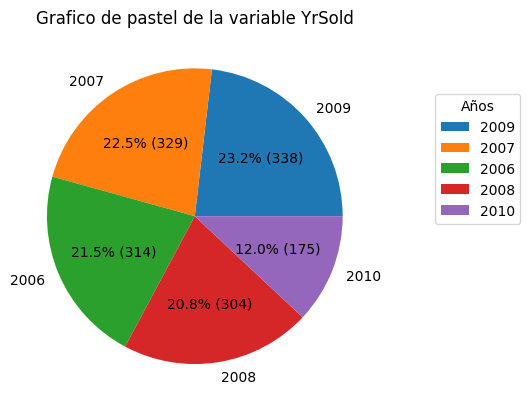

In [ ]:
#21. Visualice en gráfico de pastel la variable YrSold CON la leyenda.
# Nota. se DEBE mostrar en la misma gráfica tanto el porcentaje y el valor puntual
year_counts = df['YrSold'].value_counts()
plt.pie(year_counts, labels=year_counts.index, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(year_counts) / 100))
plt.title('Grafico de pastel de la variable YrSold')
_=plt.legend(title='Años', loc='best', bbox_to_anchor=(1.4,0.85,0,0))
plt.show()

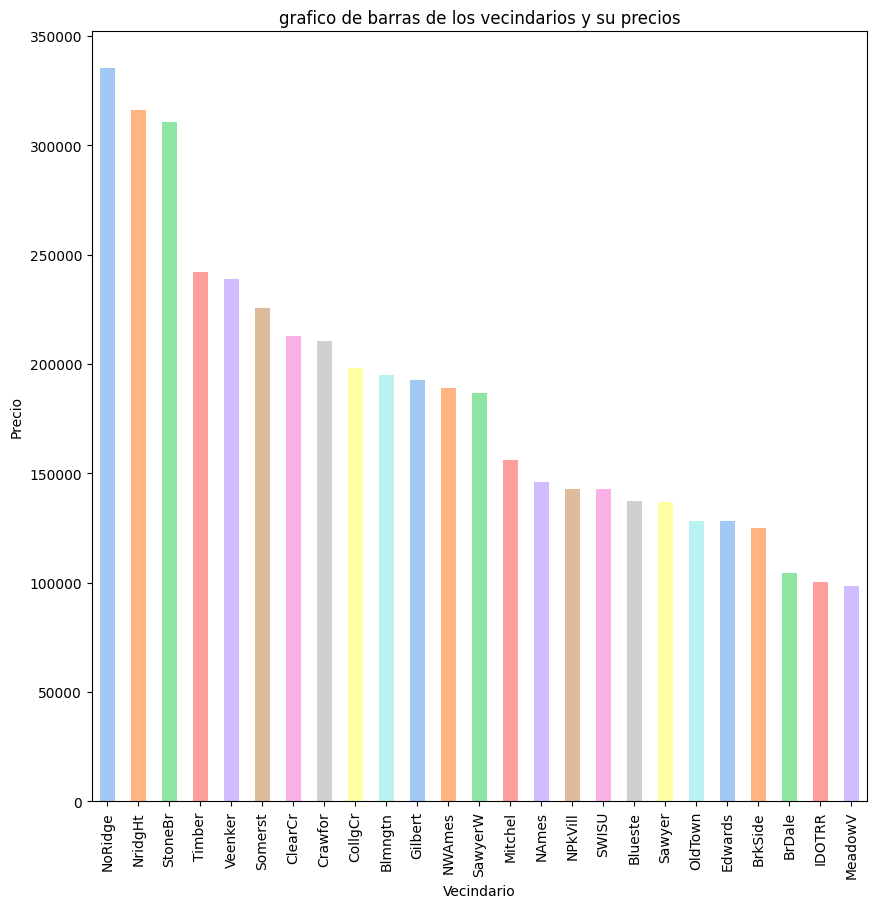

                  SalePrice
Neighborhood               
NoRidge       335295.317073
NridgHt       316270.623377
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273
Somerst       225379.837209
ClearCr       212565.428571
Crawfor       210624.725490
CollgCr       197965.773333
Blmngtn       194870.882353
Gilbert       192854.506329
NWAmes        189050.068493
SawyerW       186555.796610
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
SWISU         142591.360000
Blueste       137500.000000
Sawyer        136793.135135
OldTown       128225.300885
Edwards       128219.700000
BrkSide       124834.051724
BrDale        104493.750000
IDOTRR        100123.783784
MeadowV        98576.470588


In [ ]:
#22. En cuanto al precio de las casas, ¿Cuáles son los vecindarios más caros?
#1: Muestre los resultados en una tabla
#2: Muestre los resultados en un gráfico de barras
vecindariosCaros=df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
vecindariosCaros.plot(kind='bar',figsize=(10,10),color=sns.color_palette("pastel"))
plt.title('grafico de barras de los vecindarios y su precios')
plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.show()
vecindariosCaros=pd.DataFrame(vecindariosCaros)
print(vecindariosCaros)

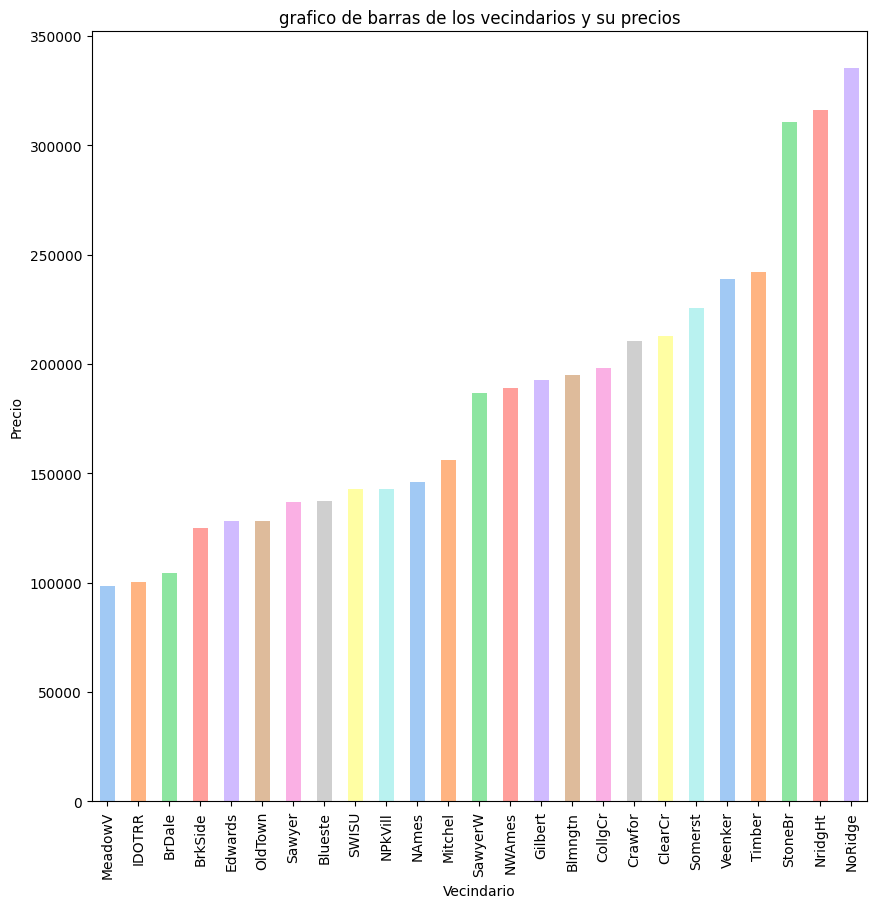

                  SalePrice
Neighborhood               
MeadowV        98576.470588
IDOTRR        100123.783784
BrDale        104493.750000
BrkSide       124834.051724
Edwards       128219.700000
OldTown       128225.300885
Sawyer        136793.135135
Blueste       137500.000000
SWISU         142591.360000
NPkVill       142694.444444
NAmes         145847.080000
Mitchel       156270.122449
SawyerW       186555.796610
NWAmes        189050.068493
Gilbert       192854.506329
Blmngtn       194870.882353
CollgCr       197965.773333
Crawfor       210624.725490
ClearCr       212565.428571
Somerst       225379.837209
Veenker       238772.727273
Timber        242247.447368
StoneBr       310499.000000
NridgHt       316270.623377
NoRidge       335295.317073


In [ ]:
#23. En cuanto al precio de las casas, ¿Cuáles son los vecindarios más baratos?
#1: Muestre los resultados en una tabla
#2: Muestre los resultados en un gráfico de barras
vecindariosBaratos=df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=True)
vecindariosBaratos.plot(kind='bar',figsize=(10,10),color=sns.color_palette("pastel"))
plt.title('grafico de barras de los vecindarios y su precios')
plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.show()
vecindariosBaratos=pd.DataFrame(vecindariosBaratos)
print(vecindariosBaratos)

# Segunda Parte: Exploracion

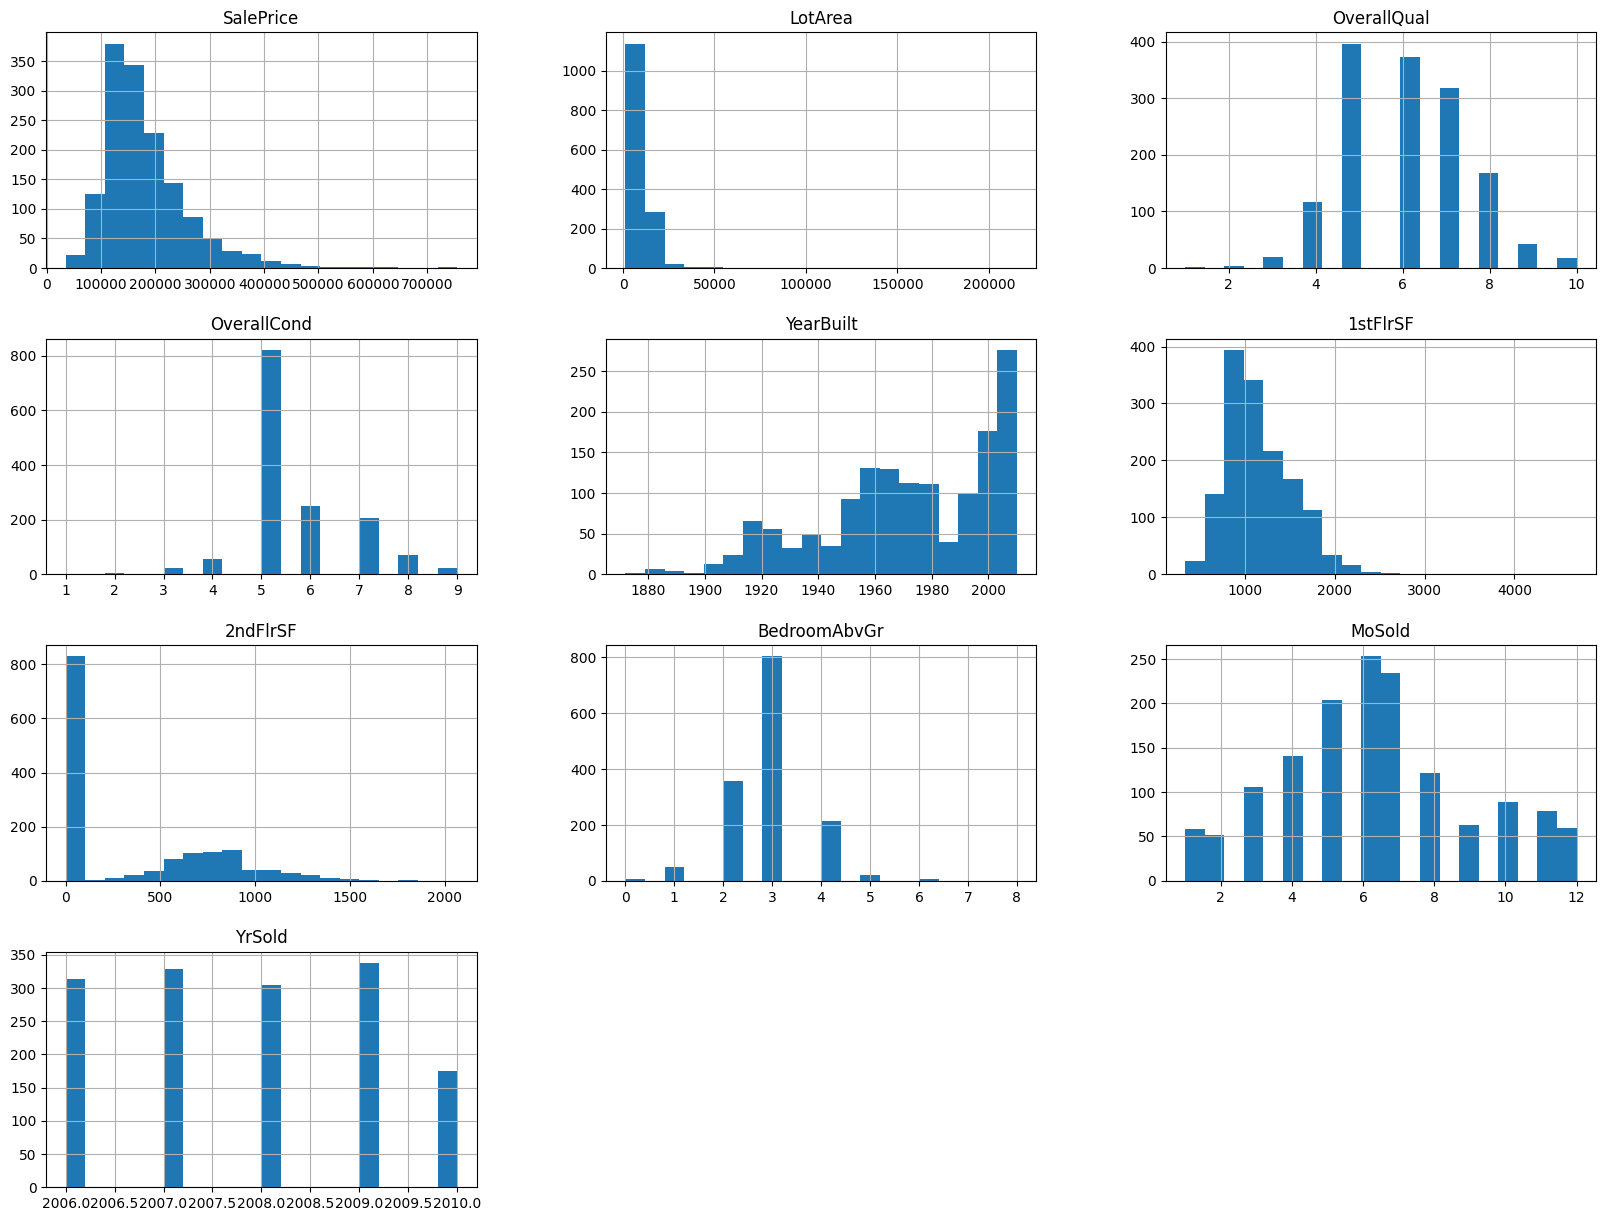

In [ ]:
#24. Visualice en un histograma TODAS las variables numéricas dadas: 'SalePrice', 'LotArea',
#'OverallQual', 'OverallCond', 'YearBuilt','1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'MoSold',
#'YrSold'
#NO un histograma hecho para cada una, sino una sola sentencia que permite graficarlas todas de una
var_numericas = ['SalePrice','LotArea','OverallQual','OverallCond','YearBuilt','1stFlrSF','2ndFlrSF','BedroomAbvGr','MoSold','YrSold']
df[var_numericas].hist(figsize=(20,15), bins=20)
plt.show()